# Spotify Rolling Stones Songs Clustering Analysis

This notebook follows the requirements in `requirements_steps.txt` to analyze and cluster Rolling Stones songs from Spotify data. Each step is clearly marked and explained.

## Step 1: Initial Data Inspection and Cleaning
- Check for duplicates, missing values, irrelevant or erroneous entries, and outliers.
- Clean the data as needed.

In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('rolling_stones_spotify.csv')

# Display the first few rows
df.head()

Unnamed: 0                         name               album release_date  \
0           0   Concert Intro Music - Live  Licked Live In NYC   2022-06-10   
1           1   Street Fighting Man - Live  Licked Live In NYC   2022-06-10   
2           2           Start Me Up - Live  Licked Live In NYC   2022-06-10   
3           3  If You Can't Rock Me - Live  Licked Live In NYC   2022-06-10   
4           4            Don’t Stop - Live  Licked Live In NYC   2022-06-10   

   track_number                      id                                   uri  \
0             1  2IEkywLJ4ykbhi1yRQvmsT  spotify:track:2IEkywLJ4ykbhi1yRQvmsT   
1             2  6GVgVJBKkGJoRfarYRvGTU  spotify:track:6GVgVJBKkGJoRfarYRvGTU   
2             3  1Lu761pZ0dBTGpzxaQoZNW  spotify:track:1Lu761pZ0dBTGpzxaQoZNW   
3             4  1agTQzOTUnGNggyckEqiDH  spotify:track:1agTQzOTUnGNggyckEqiDH   
4             5  7piGJR8YndQBQWVXv6KtQw  spotify:track:7piGJR8YndQBQWVXv6KtQw   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0        0.0824         0.463   0.993          0.996000     0.932   -12.913   
1        0.4370         0.326   0.965          0.233000     0.961    -4.803   
2        0.4160         0.386   0.969          0.400000     0.956    -4.936   
3        0.5670         0.369   0.985          0.000107     0.895    -5.535   
4        0.4000         0.303   0.969          0.055900     0.966    -5.098   

   speechiness    tempo  valence  popularity  duration_ms  
0       0.1100  118.001   0.0302          33        48640  
1       0.0759  131.455   0.3180          34       253173  
2       0.1150  130.066   0.3130          34       263160  
3       0.1930  132.994   0.1470          32       305880  
4       0.0930  130.533   0.2060          32       305106

In [27]:
# Data overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [28]:
# Check for duplicates
print('Number of duplicate rows:', df.duplicated().sum())
# Remove duplicates if any
df = df.drop_duplicates()

Number of duplicate rows: 0


In [29]:
# Check for missing values
df.isnull().sum()

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [30]:
# Optionally: Fill or drop missing values (example: drop rows with missing values)
df = df.dropna()
print('Shape after dropping missing values:', df.shape)

Shape after dropping missing values: (1610, 18)


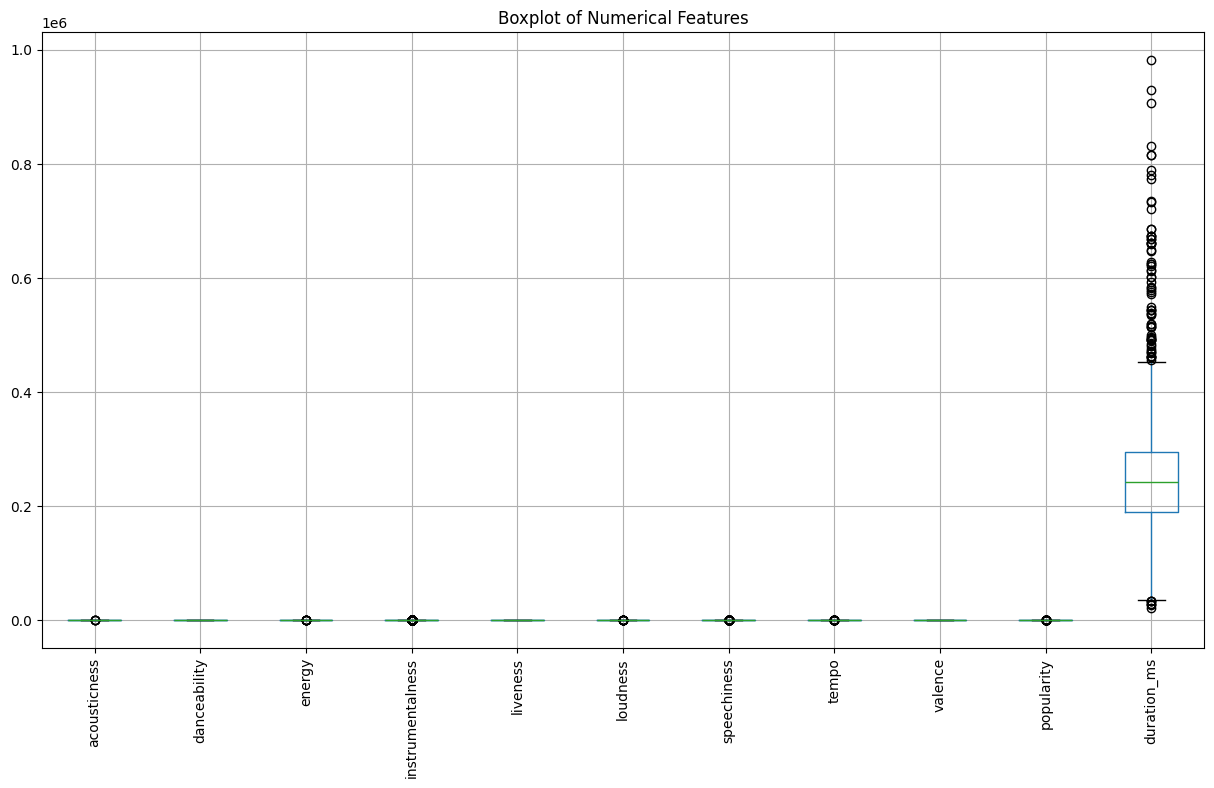

In [31]:
# Check for outliers using boxplots for numerical features
num_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'duration_ms']
plt.figure(figsize=(15, 8))
df[num_cols].boxplot(rot=90)
plt.title('Boxplot of Numerical Features')
plt.show()

## Step 2: Exploratory Data Analysis (EDA) & Feature Engineering
- Visualize and analyze the data.
- Identify patterns and relationships.
- Discuss and apply dimensionality reduction if needed.

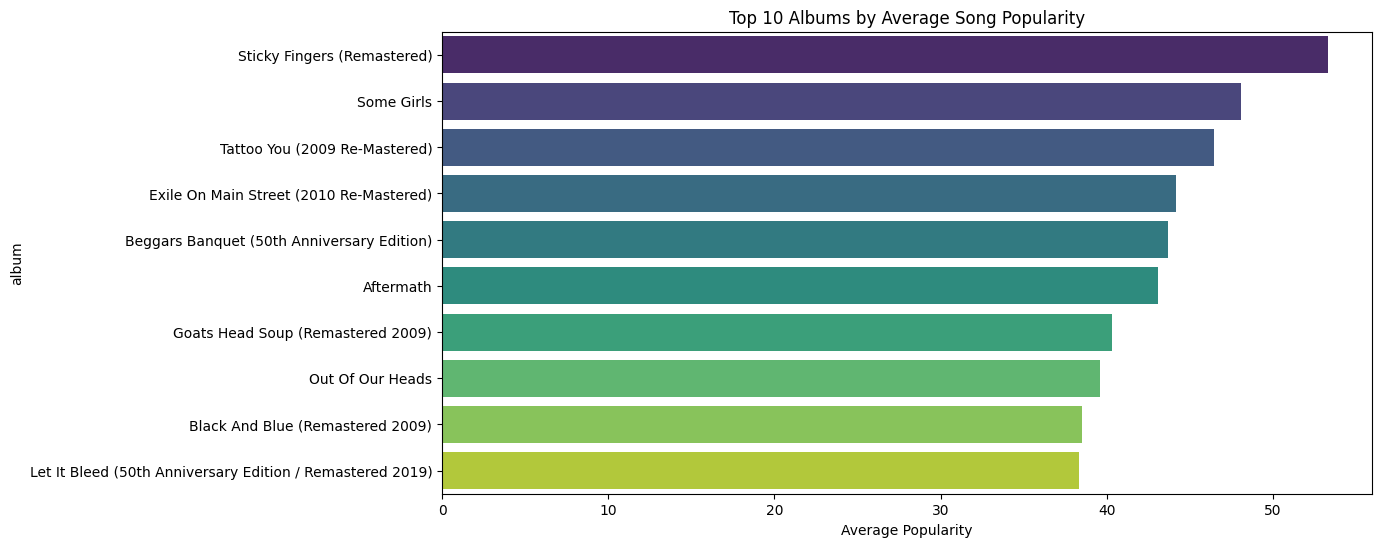

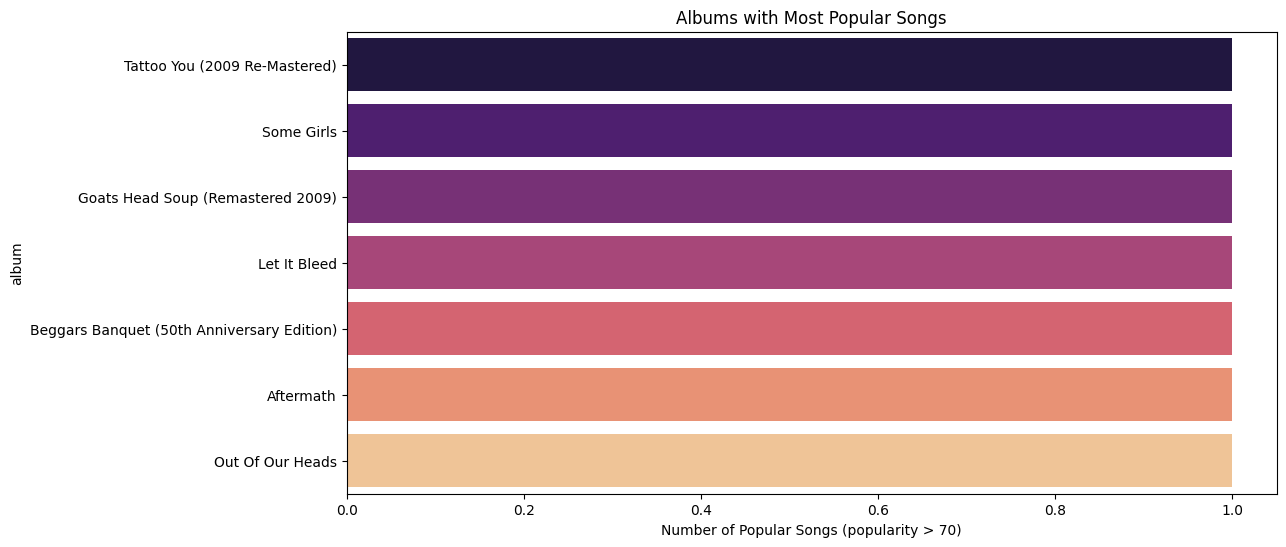

In [32]:
# 2.1: Which two albums have the most popular songs?
plt.figure(figsize=(12,6))
top_albums = df.groupby('album')['popularity'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_albums.values, y=top_albums.index, palette='viridis')
plt.xlabel('Average Popularity')
plt.title('Top 10 Albums by Average Song Popularity')
plt.show()

# Also, count of popular songs (popularity > 70) per album
popular_songs = df[df['popularity'] > 70]
album_popular_counts = popular_songs['album'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=album_popular_counts.values, y=album_popular_counts.index, palette='magma')
plt.xlabel('Number of Popular Songs (popularity > 70)')
plt.title('Albums with Most Popular Songs')
plt.show()

In [36]:
sample_df = df[num_cols].drop(columns=['duration_ms'])
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      1610 non-null   float64
 1   danceability      1610 non-null   float64
 2   energy            1610 non-null   float64
 3   instrumentalness  1610 non-null   float64
 4   liveness          1610 non-null   float64
 5   loudness          1610 non-null   float64
 6   speechiness       1610 non-null   float64
 7   tempo             1610 non-null   float64
 8   valence           1610 non-null   float64
 9   popularity        1610 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 125.9 KB


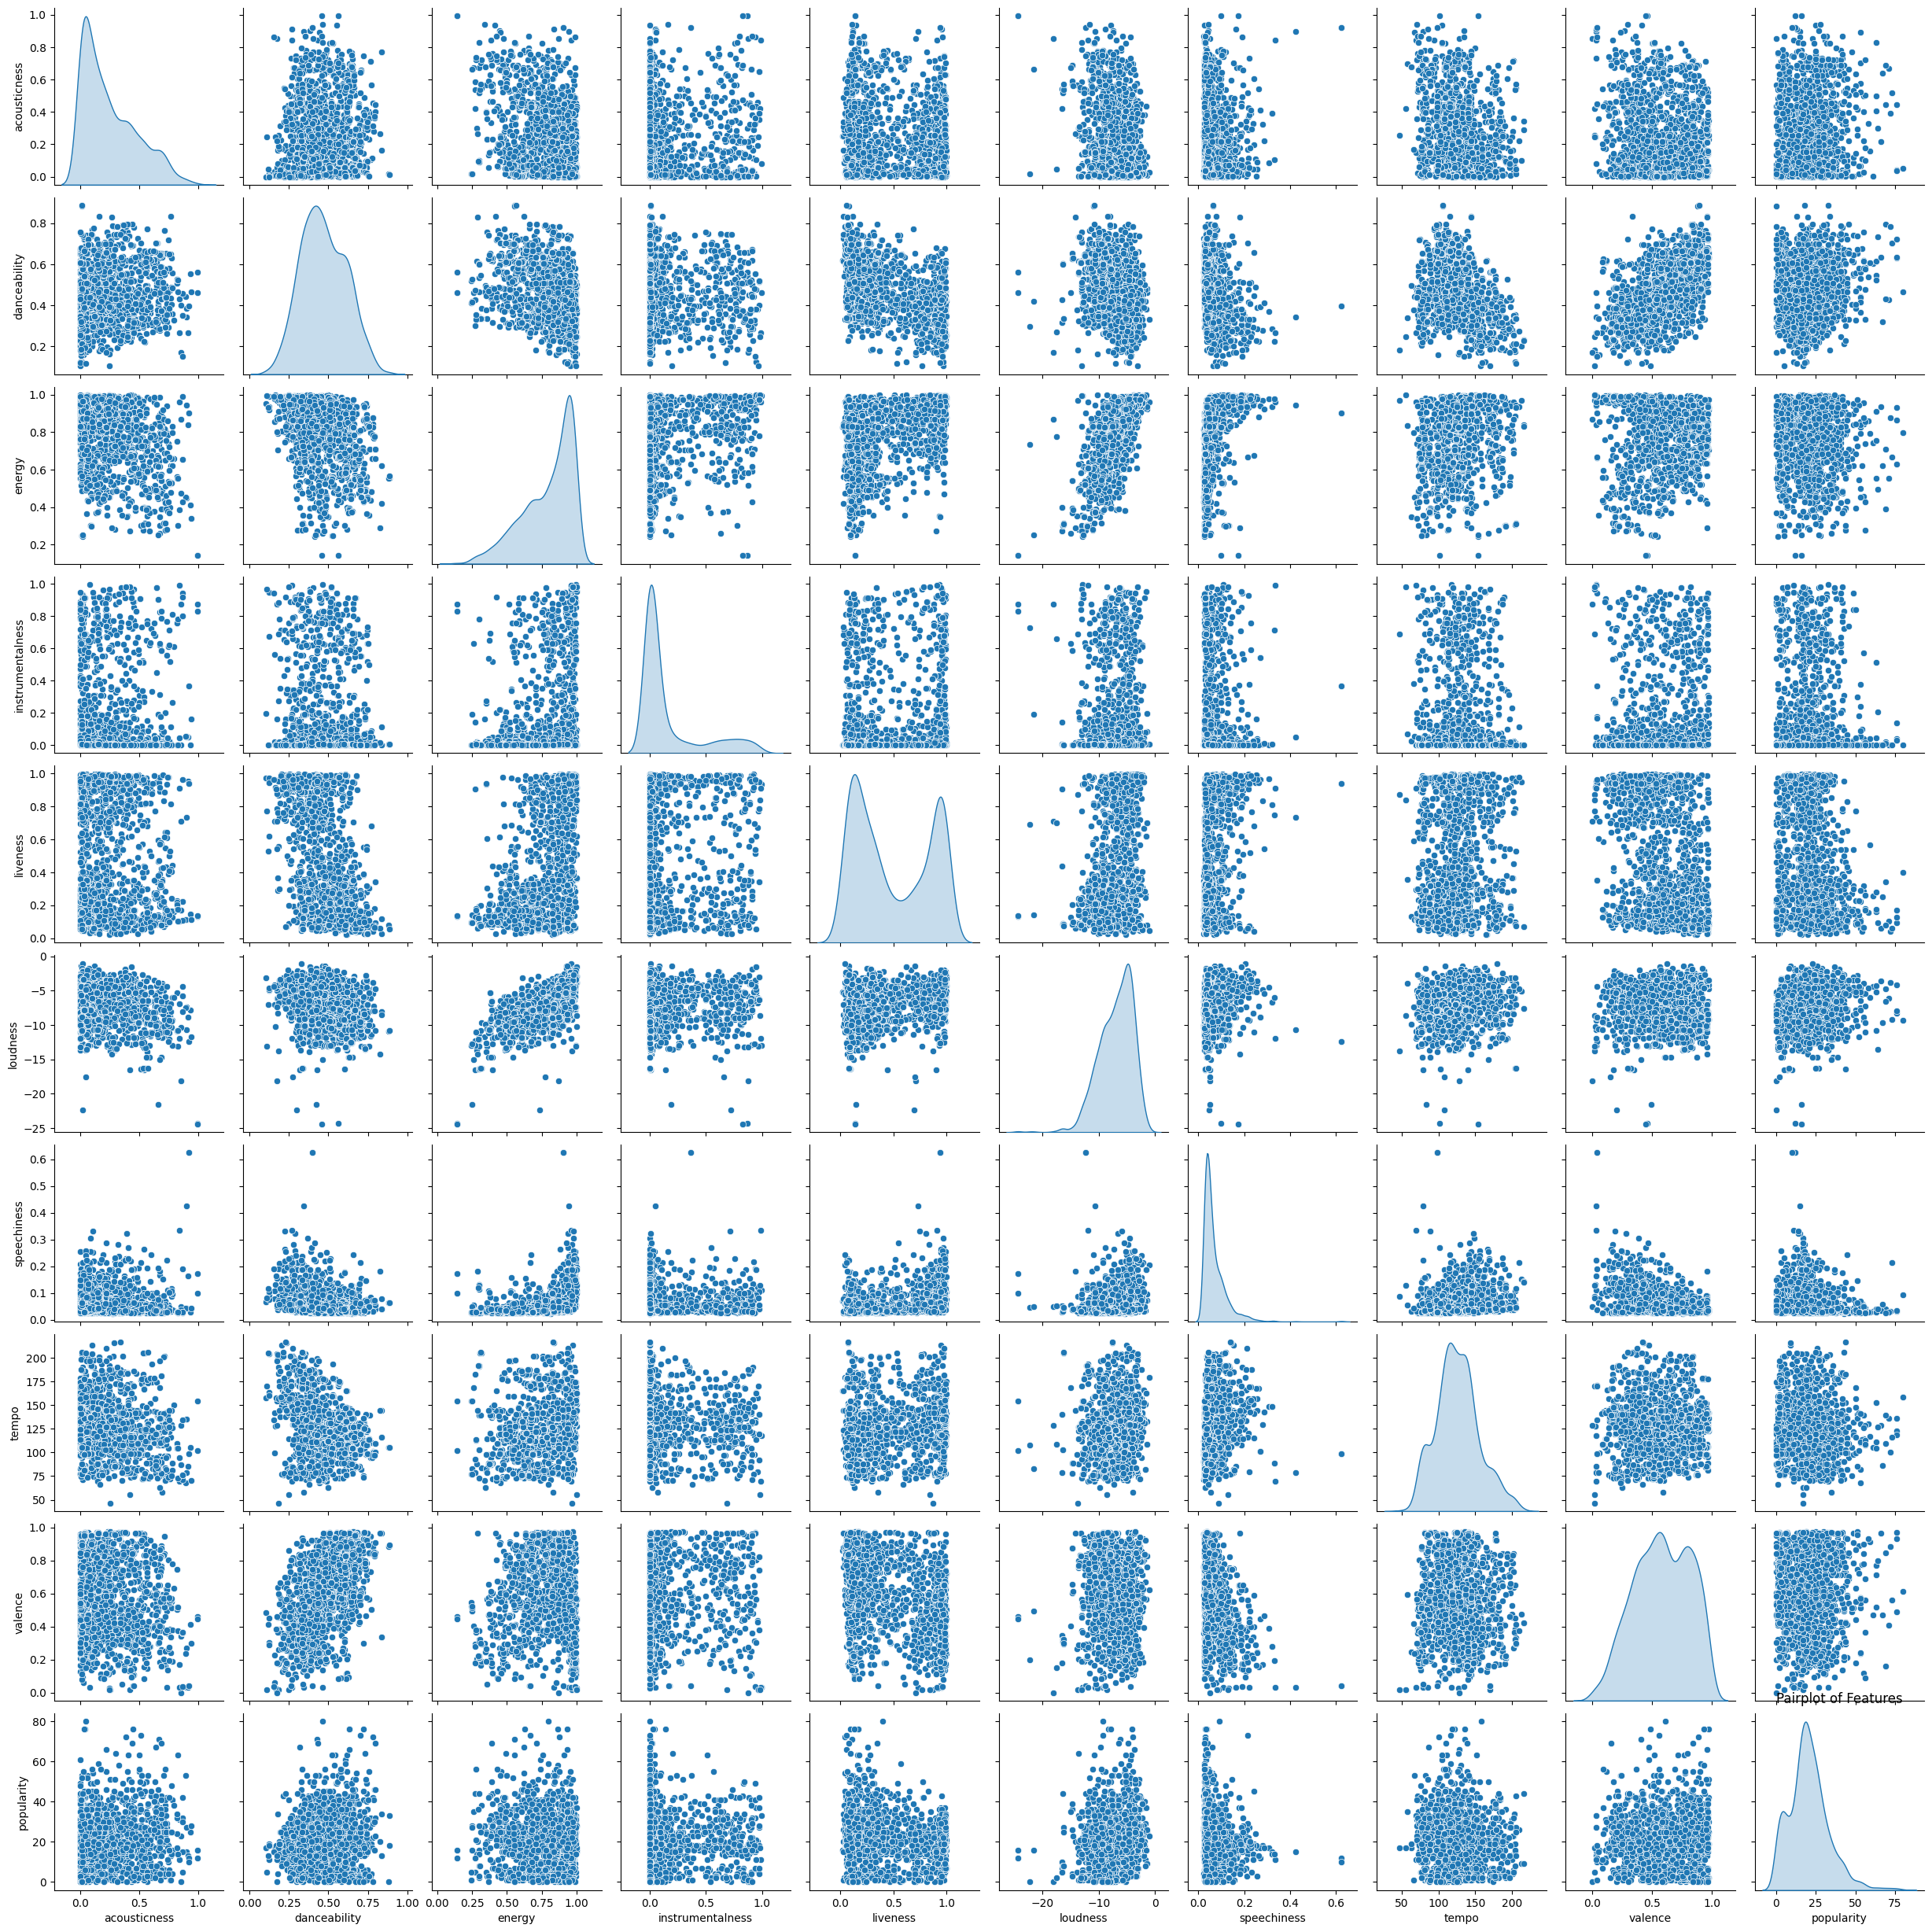

In [37]:
# 2.2: Pairplot to explore relationships between features
sns.pairplot(data=sample_df, diag_kind='kde')
plt.title('Pairplot of Features', y=1.02)
plt.show()

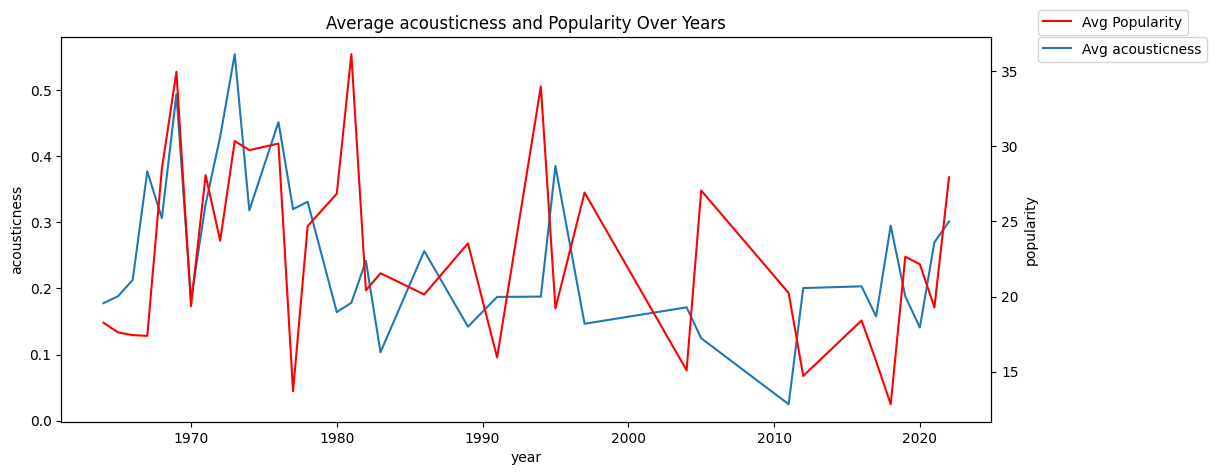

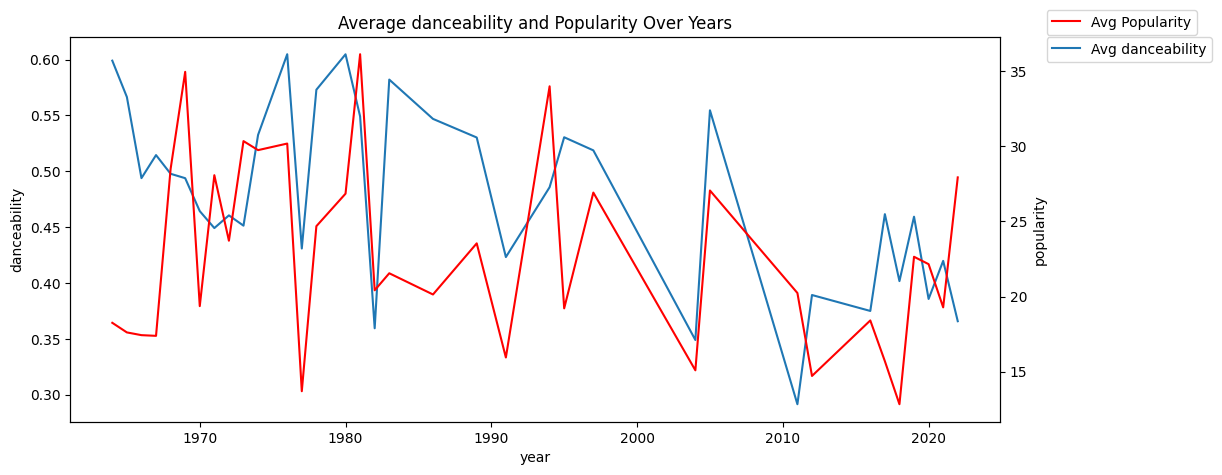

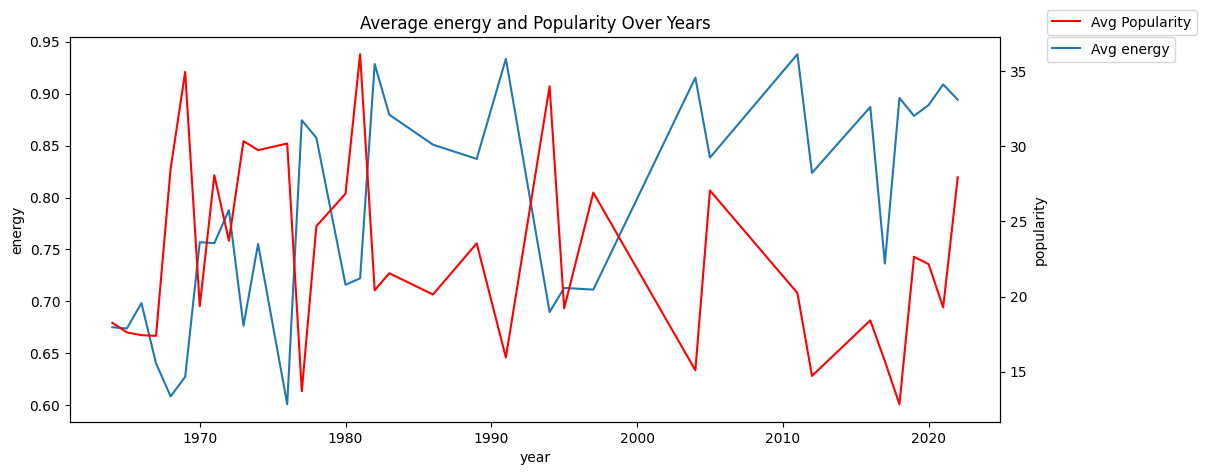

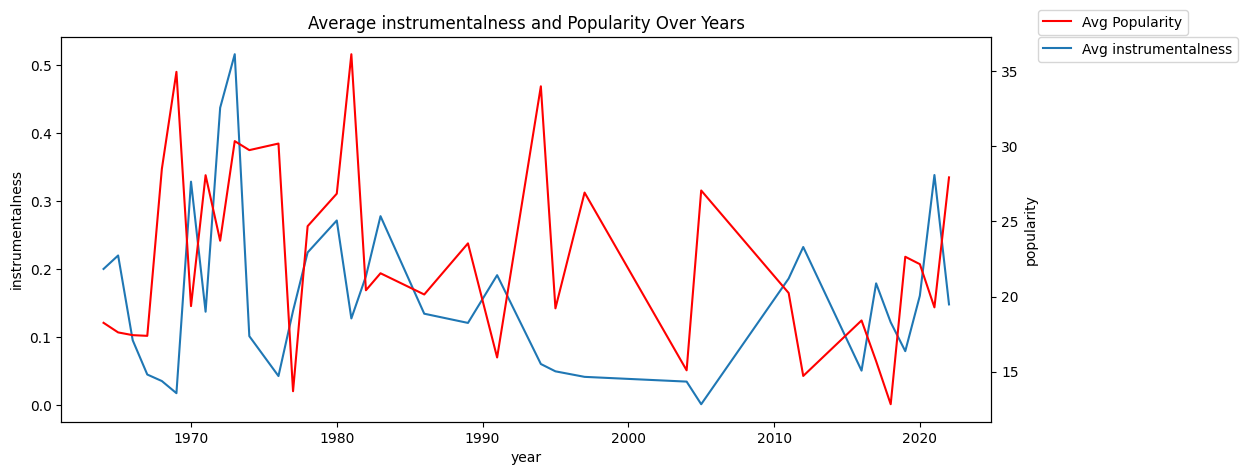

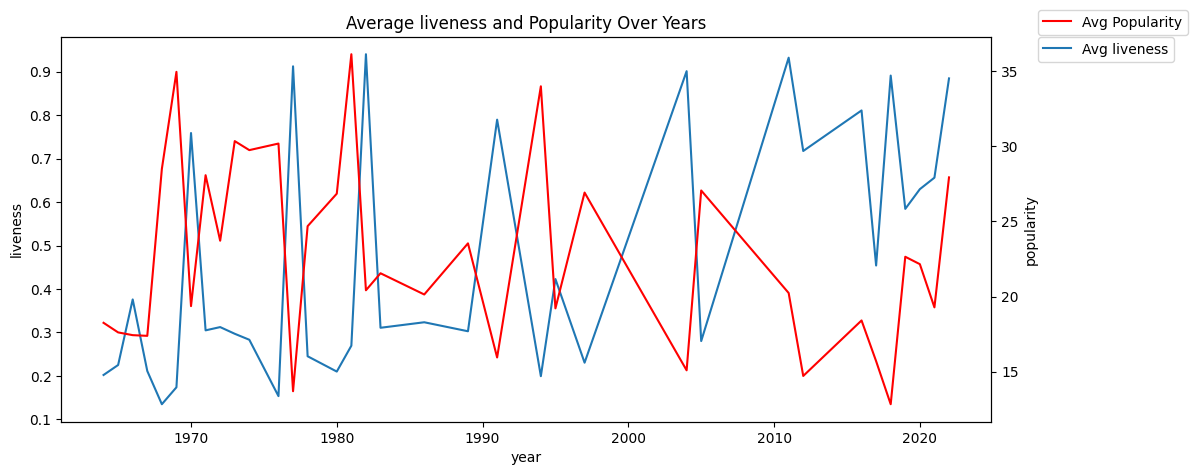

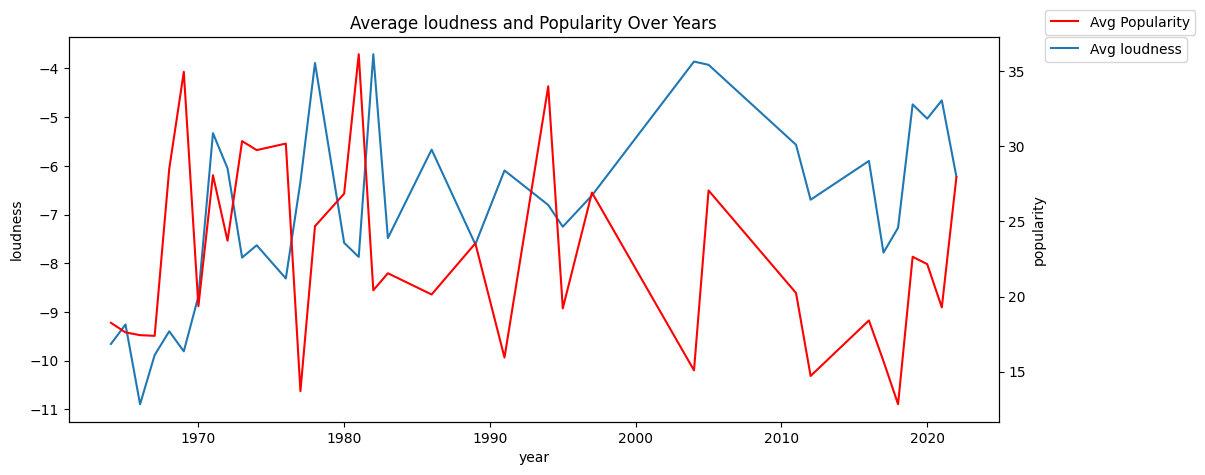

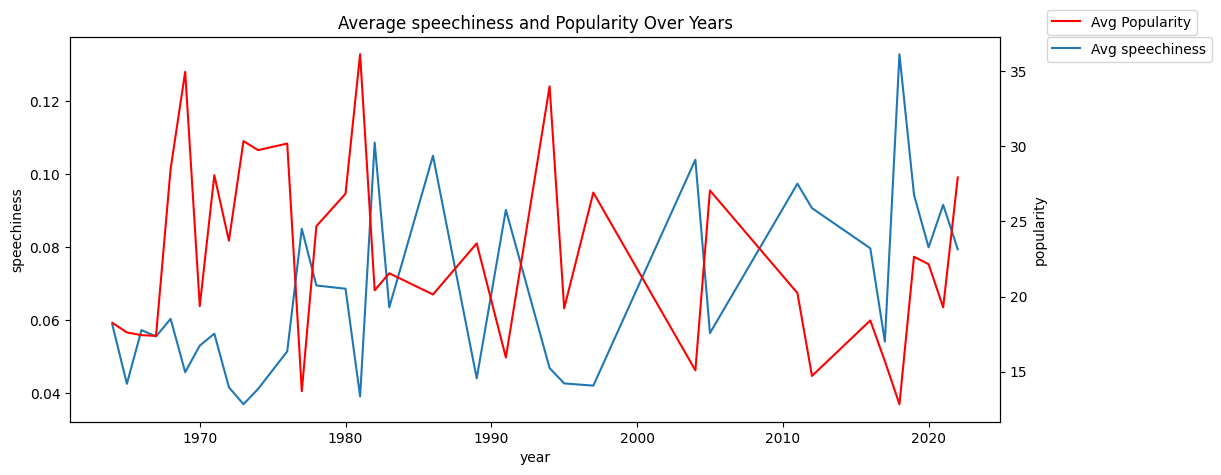

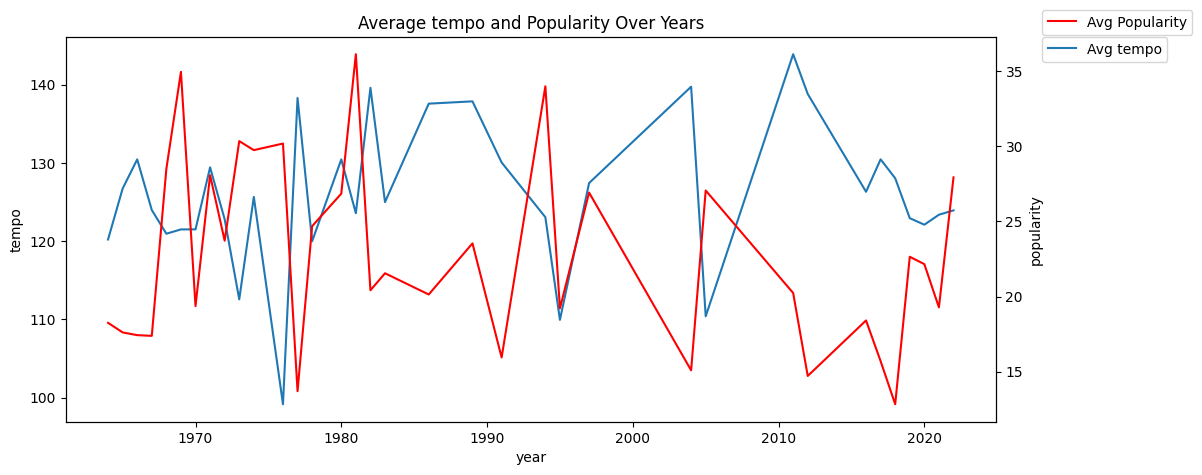

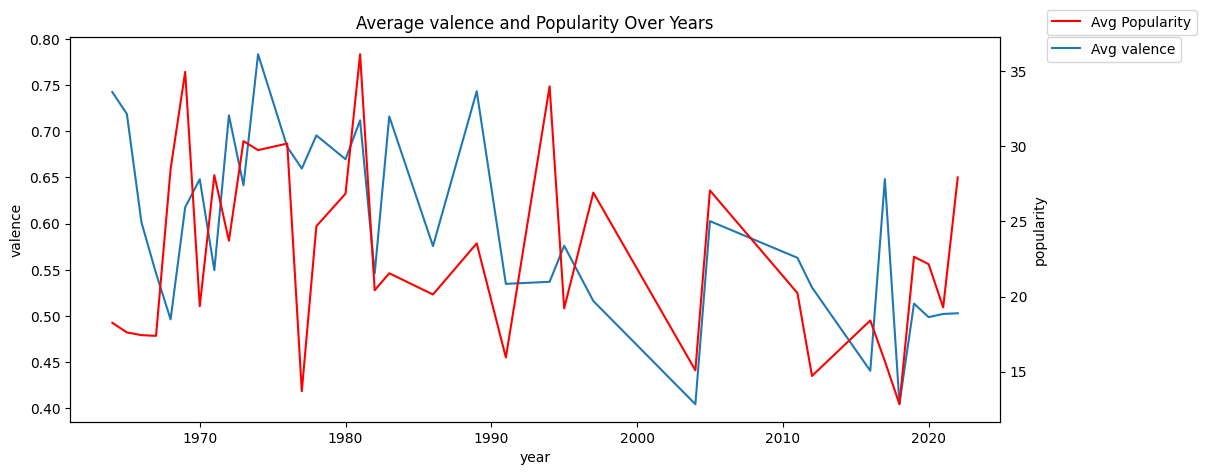

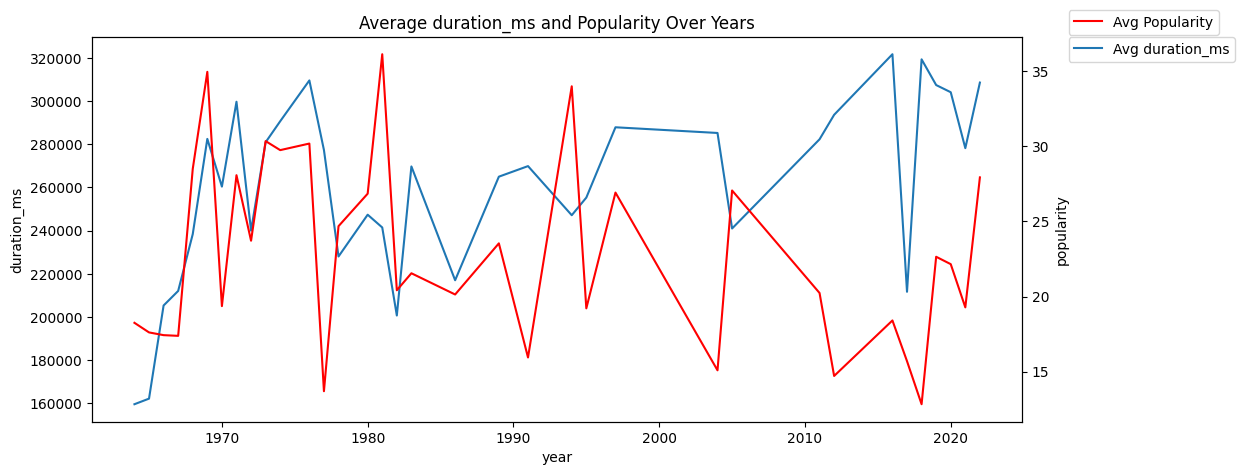

In [47]:
# 2.3: Popularity over time
# Ensure 'year' column exists
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df = df.dropna(subset=['release_date'])
df['year'] = df['release_date'].dt.year

# Plot relationship of popularity and each feature over time
for feature in num_cols:
    if feature == 'popularity':
        continue  # skip popularity itself
    plt.figure(figsize=(12,5))
    # Plot average feature value per year
    sns.lineplot(data=df.groupby('year')[feature].mean().reset_index(), x='year', y=feature, label=f'Avg {feature}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    # Plot average popularity per year (secondary axis)
    ax2 = plt.twinx()
    sns.lineplot(data=df.groupby('year')['popularity'].mean().reset_index(), x='year', y='popularity', color='r', ax=ax2, label='Avg Popularity')
    plt.title(f'Average {feature} and Popularity Over Years')
    plt.legend(bbox_to_anchor=(1.05, 1.07), loc='upper left', borderaxespad=0.)
    plt.show()

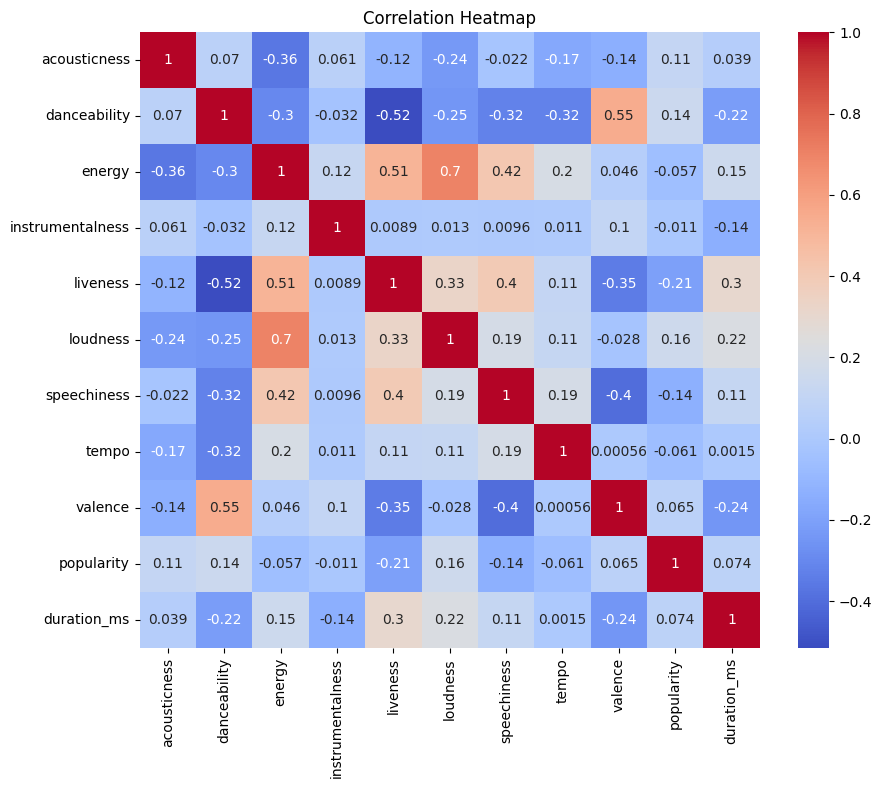

In [39]:
# 2.4: Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Dimensionality Reduction Discussion
Dimensionality reduction techniques like PCA help in visualizing high-dimensional data and can improve clustering by removing noise and redundancy. We'll use PCA to reduce features for visualization and clustering.

      acousticness  danceability  energy  instrumentalness  liveness  \
0           0.0824         0.463   0.993          0.996000    0.9320   
1           0.4370         0.326   0.965          0.233000    0.9610   
2           0.4160         0.386   0.969          0.400000    0.9560   
3           0.5670         0.369   0.985          0.000107    0.8950   
4           0.4000         0.303   0.969          0.055900    0.9660   
...            ...           ...     ...               ...       ...   
1605        0.1570         0.466   0.932          0.006170    0.3240   
1606        0.0576         0.509   0.706          0.000002    0.5160   
1607        0.3710         0.790   0.774          0.000000    0.0669   
1608        0.2170         0.700   0.546          0.000070    0.1660   
1609        0.3830         0.727   0.934          0.068500    0.0965   

      loudness  speechiness    tempo  valence  popularity  duration_ms  
0      -12.913       0.1100  118.001   0.0302          33     

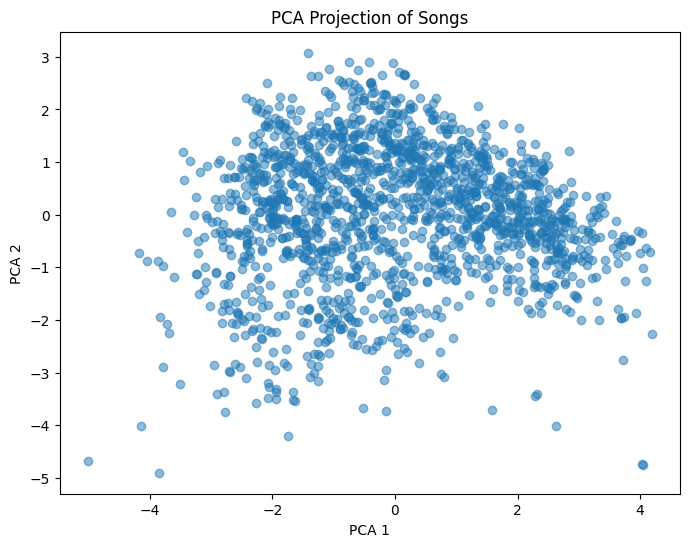

In [ ]:
# Standardize features for clustering
features = df[num_cols]
#print(features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

#print(X_pca[:,0])
#print(X_pca)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA Projection of Songs')
plt.show()

## Step 3: Cluster Analysis
- Identify the right number of clusters.
- Apply clustering algorithm.
- Define and interpret clusters.

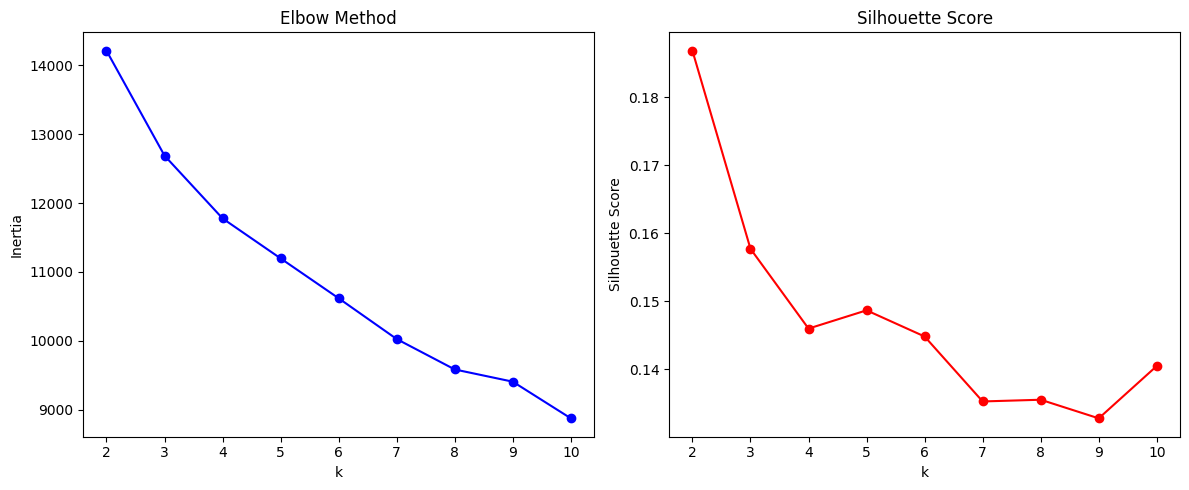

In [50]:
# 3.1: Find optimal number of clusters using Elbow and Silhouette methods
inertia = []
silhouette = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.subplot(1,2,2)
plt.plot(K, silhouette, 'ro-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.tight_layout()
plt.show()

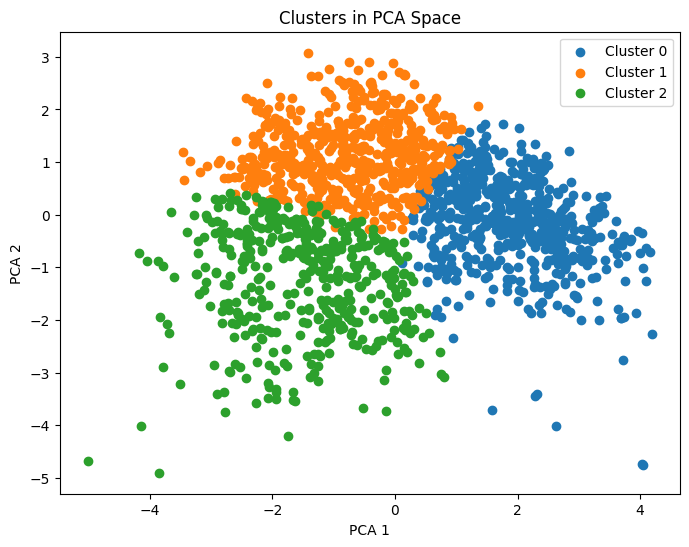

In [53]:
# 3.2: Fit KMeans with optimal k (choose based on above plots, e.g., k=3)
optimal_k = 3  # Change this based on the plots above
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters in PCA space
plt.figure(figsize=(8,6))
for i in range(optimal_k):
    plt.scatter(X_pca[df['cluster']==i,0], X_pca[df['cluster']==i,1], label=f'Cluster {i}')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clusters in PCA Space')
plt.legend()
plt.show()

In [ ]:
# 3.3: Define each cluster based on feature means
cluster_summary = df.groupby('cluster')[num_cols + ['popularity']].mean()
cluster_summary

## Step 4: Recommendations
- Provide recommendations based on the cluster analysis.

In [ ]:
# Example recommendations based on clusters
for i in range(optimal_k):
    print(f'\nCluster {i}:')
    print('Number of songs:', (df['cluster']==i).sum())
    print('Top 3 albums in this cluster:')
    print(df[df['cluster']==i]['album'].value_counts().head(3))
    print('Average popularity:', df[df['cluster']==i]['popularity'].mean())
    print('---')

### Summary
- We performed data cleaning, EDA, feature engineering, clustering, and provided recommendations based on song clusters.
- You can further tune the clustering and recommendations based on business needs.